In [1]:
import numpy as np
import matplotlib.pyplot as plt
import astropy.io.fits as fits
import os
import glob
from astropy.table import Table
from astropy.io import ascii
import astropy.units as u
import astropy.constants as const
from astropy.modeling import models, fitting
import lightkurve as lk
import matplotlib.gridspec as gridspec

#matplotlib set up
%matplotlib inline
from matplotlib import rcParams
rcParams["figure.figsize"] = (14, 5)
rcParams["font.size"] = 20

Quick looks at TESS data as I get to it. Need to vet that the 2min light curves are actually the right stars!

In [4]:
#Lmcom, p = 372.52min
#tessfits = '/home/david/work/pceb/tess/MAST_2020-06-16T1742/TESS/tess2020049080258-s0022-0000000082347011-0174-s/tess2020049080258-s0022-0000000082347011-0174-s_lc.fits' 

In [2]:
"""data = fits.getdata(tessfits, 1)

t, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']
t, f, e = t[q==0], f[q==0], e[q==0]
#fit = np.polyval((np.polyfit(t,f,1)), t)
#f = (f/fit)-1
#e = (e/fit)-1
plt.scatter(t,f)
"""

"data = fits.getdata(tessfits, 1)\n\nt, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']\nt, f, e = t[q==0], f[q==0], e[q==0]\n#fit = np.polyval((np.polyfit(t,f,1)), t)\n#f = (f/fit)-1\n#e = (e/fit)-1\nplt.scatter(t,f)\n"

In [3]:
"""lc = lk.LightCurve(time=t, flux=f, flux_err=e).remove_outliers(sigma=5)
pg = lc.to_periodogram(oversample_factor=10,minimum_period=4*u.minute, maximum_period=2.5*u.day)
pg.plot()
print(pg.period_at_max_power.to(u.min))"""

'lc = lk.LightCurve(time=t, flux=f, flux_err=e).remove_outliers(sigma=5)\npg = lc.to_periodogram(oversample_factor=10,minimum_period=4*u.minute, maximum_period=2.5*u.day)\npg.plot()\nprint(pg.period_at_max_power.to(u.min))'

In [4]:
"""lcfold = lc.fold(pg.period_at_max_power).bin(50)
lcfold.errorbar()"""

'lcfold = lc.fold(pg.period_at_max_power).bin(50)\nlcfold.errorbar()'

In [5]:
"""#wd0137,p = 116 min
#four fits files retuned, should be the one endon 067...
path = '/home/david/work/pceb/tess/MAST_2020-06-16T1851/TESS/tess2018263035959-s0003-0000000032307067-0123-s/'
#for p in os.listdir(path):
fitspath  = glob.glob(path+'*lc.fits')[0]
print(fitspath)
data = data = fits.getdata(fitspath, 1)

t, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']
t, f, e = t[q==0], f[q==0], e[q==0]
plt.scatter(t,f)
plt.show()
lc = lk.LightCurve(time=t, flux=f, flux_err=e).remove_outliers(sigma=5)
pg = lc.to_periodogram(oversample_factor=10,minimum_period=4*u.minute, maximum_period=2.5*u.day)
pg.plot()
print(pg.period_at_max_power.to(u.min))
plt.show()
lcfold = lc.fold(pg.period_at_max_power).bin(50)
lcfold.errorbar()"""

"#wd0137,p = 116 min\n#four fits files retuned, should be the one endon 067...\npath = '/home/david/work/pceb/tess/MAST_2020-06-16T1851/TESS/tess2018263035959-s0003-0000000032307067-0123-s/'\n#for p in os.listdir(path):\nfitspath  = glob.glob(path+'*lc.fits')[0]\nprint(fitspath)\ndata = data = fits.getdata(fitspath, 1)\n\nt, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']\nt, f, e = t[q==0], f[q==0], e[q==0]\nplt.scatter(t,f)\nplt.show()\nlc = lk.LightCurve(time=t, flux=f, flux_err=e).remove_outliers(sigma=5)\npg = lc.to_periodogram(oversample_factor=10,minimum_period=4*u.minute, maximum_period=2.5*u.day)\npg.plot()\nprint(pg.period_at_max_power.to(u.min))\nplt.show()\nlcfold = lc.fold(pg.period_at_max_power).bin(50)\nlcfold.errorbar()"

/home/david/work/pceb/tess/MAST_2020-07-23T1832/TESS/tess2020049080258-s0022-0000000082347011-0174-s/tess2020049080258-s0022-0000000082347011-0174-s_lc.fits
186.628638038814 30.6479591154793
0.25880615422051284 d


/home/david/anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:108: LightkurveWarning: LightCurve object contains NaN times
  warnings.warn('LightCurve object contains NaN times', LightkurveWarning)


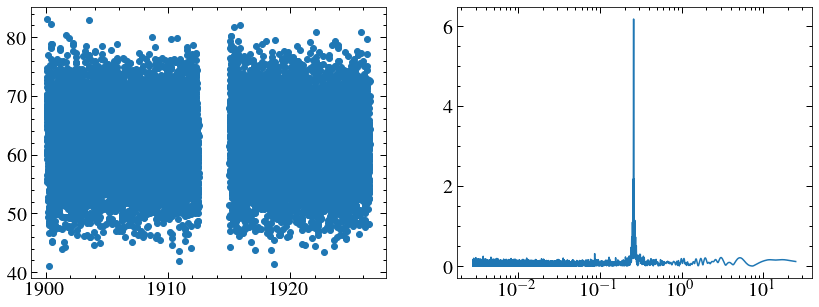

/home/david/work/pceb/tess/MAST_2020-07-23T1832/TESS/tess2020049080258-s0022-0000000313274579-0174-s/tess2020049080258-s0022-0000000313274579-0174-s_lc.fits
205.250124681508 60.4362287045219
0.003176533192591961 d


/home/david/anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:108: LightkurveWarning: LightCurve object contains NaN times
  warnings.warn('LightCurve object contains NaN times', LightkurveWarning)
/home/david/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


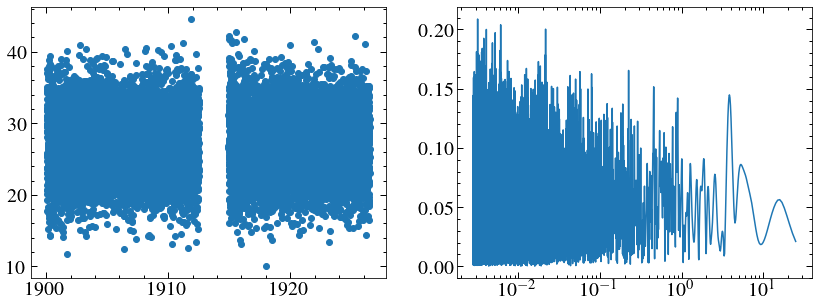

/home/david/work/pceb/tess/MAST_2020-07-23T1832/TESS/tess2018263035959-s0003-0000000032314066-0123-s/tess2018263035959-s0003-0000000032314066-0123-s_lc.fits
25.037412 -34.568998
0.011149943568702268 d


/home/david/anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:108: LightkurveWarning: LightCurve object contains NaN times
  warnings.warn('LightCurve object contains NaN times', LightkurveWarning)


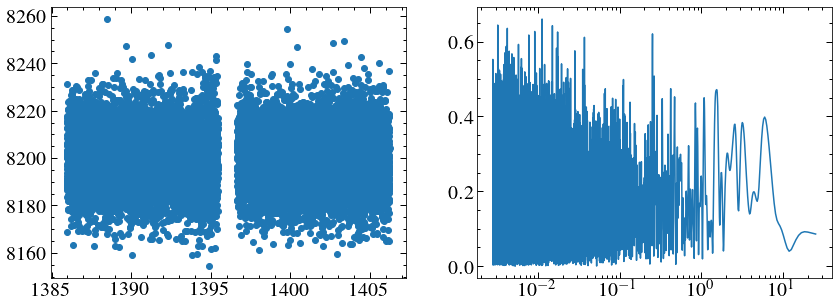

/home/david/work/pceb/tess/MAST_2020-07-23T1832/TESS/tess2019198215352-s0014-0000000027685055-0150-s/tess2019198215352-s0014-0000000027685055-0150-s_lc.fits
295.932004187658 50.077201510089
5.091040791709266 d


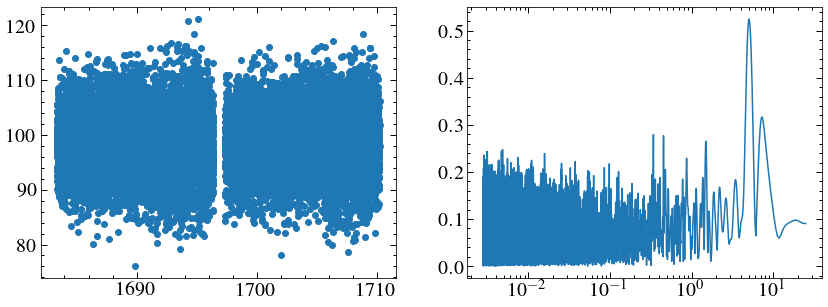

/home/david/work/pceb/tess/MAST_2020-07-23T1832/TESS/tess2019112060037-s0011-0000000349233389-0143-s/tess2019112060037-s0011-0000000349233389-0143-s_lc.fits
219.802684 -21.837188
2.18468526144199 d


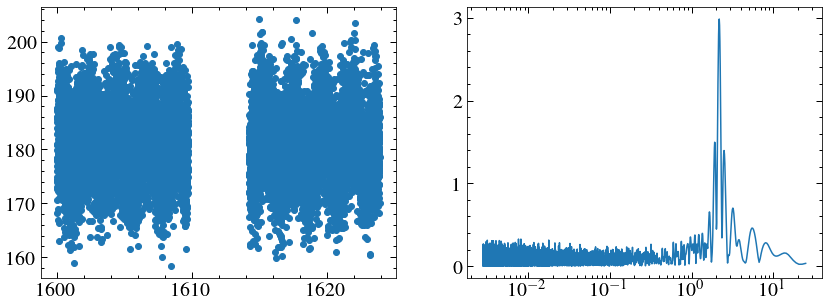

/home/david/work/pceb/tess/MAST_2020-07-23T1832/TESS/tess2019226182529-s0015-0000000027685055-0151-s/tess2019226182529-s0015-0000000027685055-0151-s_lc.fits
295.932004187658 50.077201510089
7.176700973281316 d


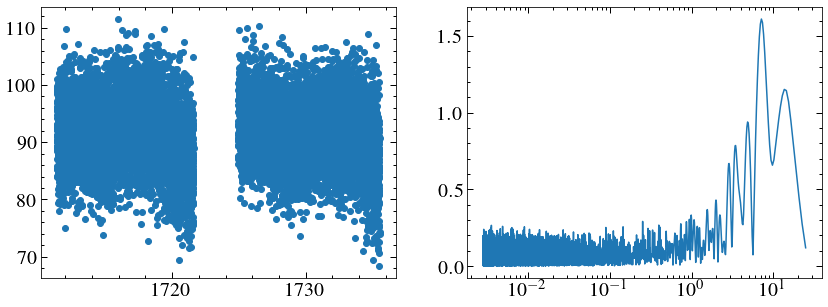

/home/david/work/pceb/tess/MAST_2020-07-23T1832/TESS/tess2018263035959-s0003-0000000032307067-0123-s/tess2018263035959-s0003-0000000032307067-0123-s_lc.fits
24.928529 -34.710922


/home/david/anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:108: LightkurveWarning: LightCurve object contains NaN times
  warnings.warn('LightCurve object contains NaN times', LightkurveWarning)


0.07943666522807709 d


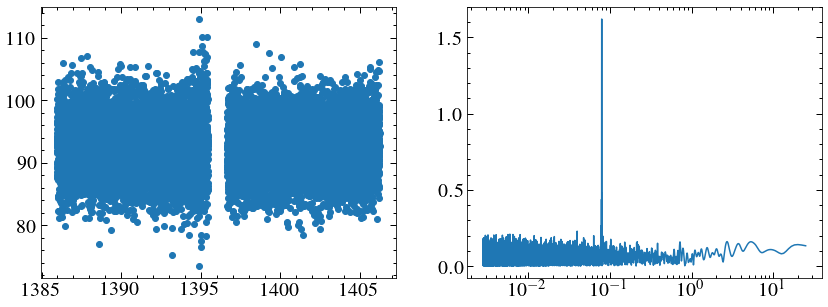

/home/david/work/pceb/tess/MAST_2020-07-23T1832/TESS/tess2020049080258-s0022-0000000416538823-0174-s/tess2020049080258-s0022-0000000416538823-0174-s_lc.fits
183.933741620044 52.5170250022383
0.6683935857242642 d


/home/david/anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:108: LightkurveWarning: LightCurve object contains NaN times
  warnings.warn('LightCurve object contains NaN times', LightkurveWarning)


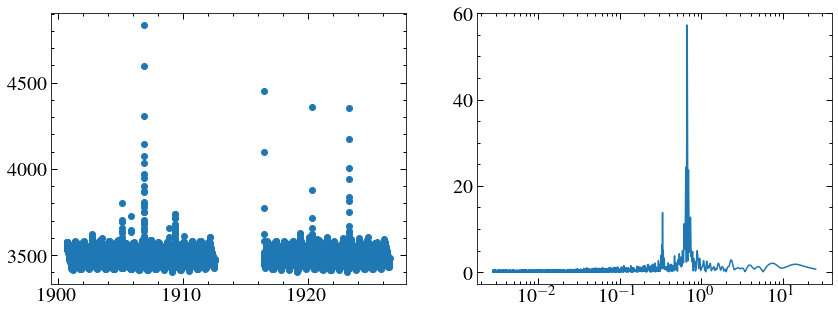

/home/david/work/pceb/tess/MAST_2020-07-23T1832/TESS/tess2019112060037-s0011-0000000398365709-0143-s/tess2019112060037-s0011-0000000398365709-0143-s_lc.fits
161.042634 -69.305008
0.33689695332661646 d


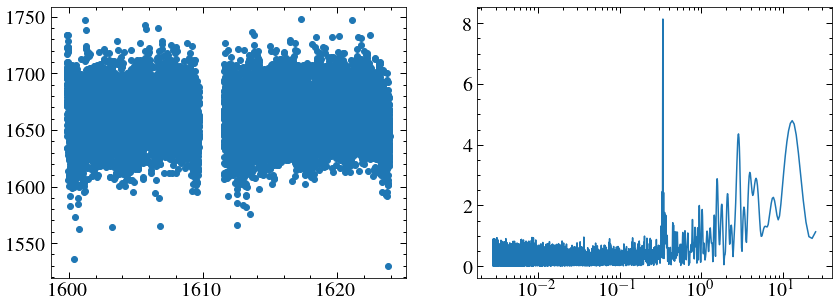

/home/david/work/pceb/tess/MAST_2020-07-23T1832/TESS/tess2020020091053-s0021-0000000313274579-0167-s/tess2020020091053-s0021-0000000313274579-0167-s_lc.fits
205.250124681508 60.4362287045219
13.060306749437075 d


/home/david/anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:108: LightkurveWarning: LightCurve object contains NaN times
  warnings.warn('LightCurve object contains NaN times', LightkurveWarning)
/home/david/anaconda3/lib/python3.7/site-packages/astropy/units/quantity.py:477: RuntimeWarning: invalid value encountered in sqrt
  result = super().__array_ufunc__(function, method, *arrays, **kwargs)


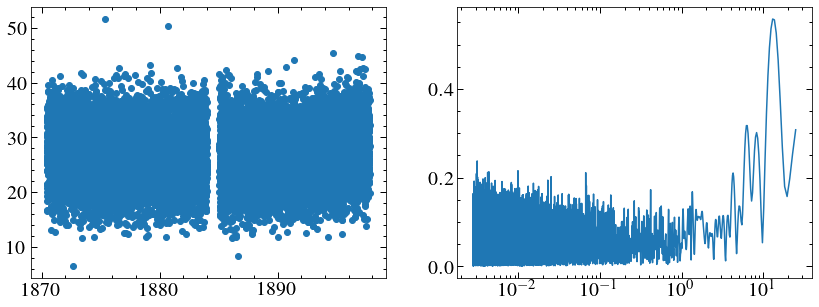

/home/david/work/pceb/tess/MAST_2020-07-23T1832/TESS/tess2019226182529-s0015-0000000416538823-0151-s/tess2019226182529-s0015-0000000416538823-0151-s_lc.fits
183.933741620044 52.5170250022383
0.6678064565545051 d


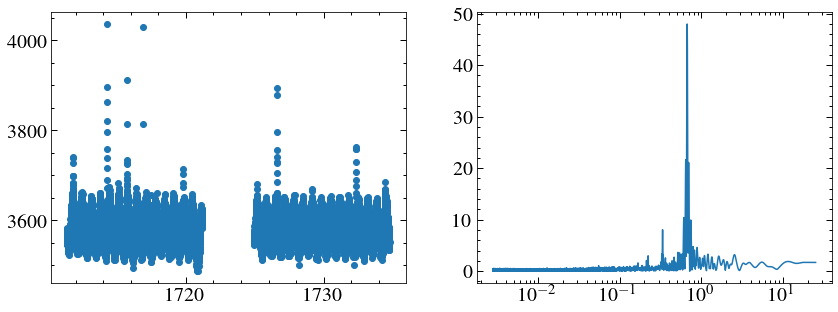

/home/david/work/pceb/tess/MAST_2020-07-23T1832/TESS/tess2019357164649-s0020-0000000441569276-0165-s/tess2019357164649-s0020-0000000441569276-0165-s_lc.fits
109.290773747342 74.011259405397


/home/david/anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:108: LightkurveWarning: LightCurve object contains NaN times
  warnings.warn('LightCurve object contains NaN times', LightkurveWarning)


0.1030645935313367 d


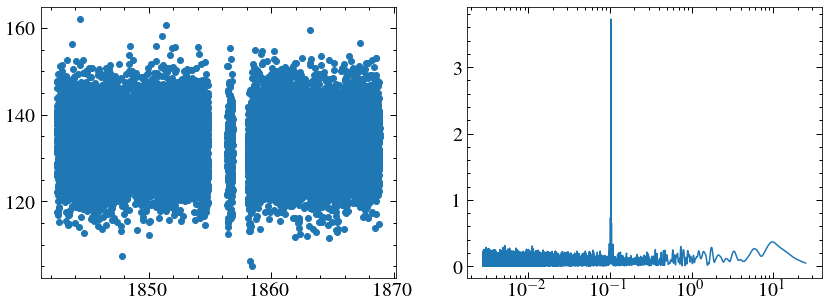

In [14]:
path = '/home/david/work/pceb/tess/MAST_2020-07-23T1832/TESS/'
datasets = glob.glob(path+'tess*')
for dset in datasets:
    tessfits = glob.glob(dset+'/*lc.fits')[0]
    print(tessfits)
    hdul = fits.open(tessfits)
    #data = fits.getdata(tessfits, 1)
    data = hdul[1].data
    hdr = hdul[0].header
    print(hdr['RA_OBJ'], hdr['DEC_OBJ'])
    hdul.close()
    t, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']
    t, f, e = t[q==0], f[q==0], e[q==0]
    #fit = np.polyval((np.polyfit(t,f,1)), t)
    #f = (f/fit)-1
    #e = (e/fit)-1
    plt.subplot(121)
    plt.scatter(t,f)
    
    plt.subplot(122)
    lc = lk.LightCurve(time=t, flux=f, flux_err=e).remove_outliers(sigma=5)
    pg = lc.to_periodogram(oversample_factor=10,minimum_period=4*u.minute, maximum_period=25*u.day)
    plt.plot(pg.period, pg.power)
    plt.xscale('log')

    print(pg.period_at_max_power.to(u.day))
    plt.show()

Ok EG Uma is a thing...

183.933741620044 52.5170250022383


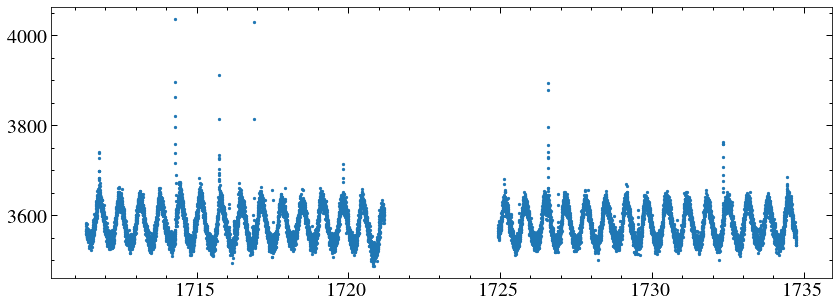

0.6678064565545051 d


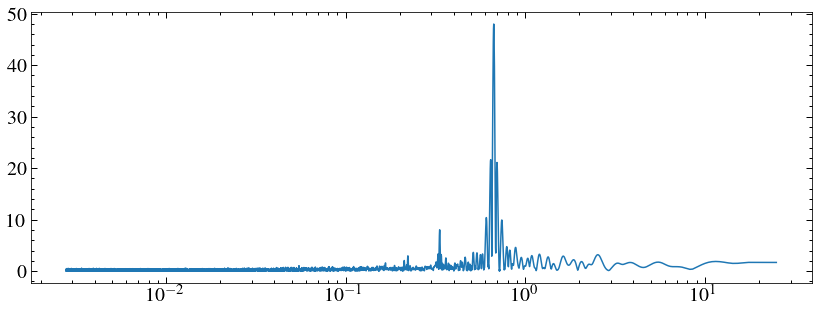

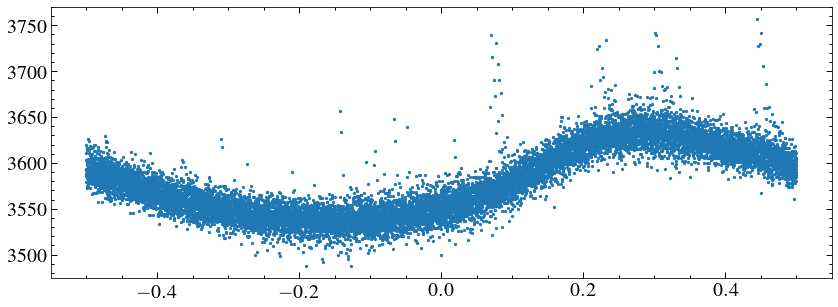

183.933741620044 52.5170250022383


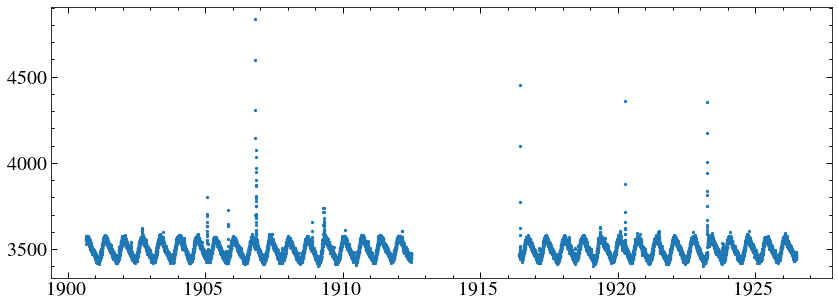

/home/david/anaconda3/lib/python3.7/site-packages/lightkurve/lightcurve.py:108: LightkurveWarning: LightCurve object contains NaN times
  warnings.warn('LightCurve object contains NaN times', LightkurveWarning)


0.6683935857242642 d


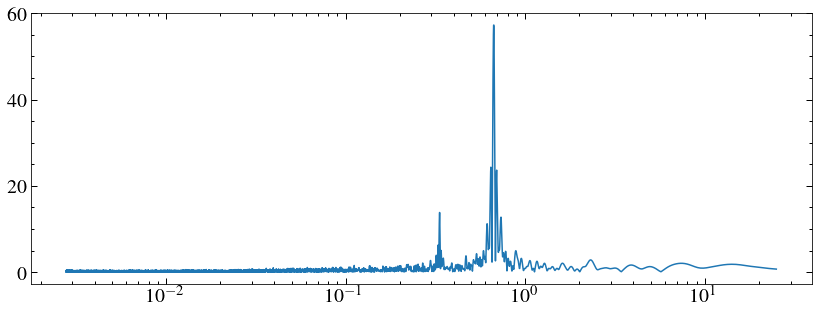

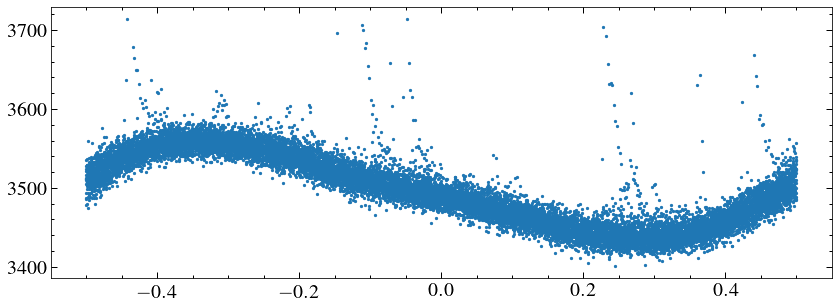

In [22]:
eg_uma_fits= ['/home/david/work/pceb/tess/MAST_2020-07-23T1832/TESS/tess2019226182529-s0015-0000000416538823-0151-s/tess2019226182529-s0015-0000000416538823-0151-s_lc.fits',
'/home/david/work/pceb/tess/MAST_2020-07-23T1832/TESS/tess2020049080258-s0022-0000000416538823-0174-s/tess2020049080258-s0022-0000000416538823-0174-s_lc.fits']

for tessfits in eg_uma_fits:
    hdul = fits.open(tessfits)
    #data = fits.getdata(tessfits, 1)
    data = hdul[1].data
    hdr = hdul[0].header
    print(hdr['RA_OBJ'], hdr['DEC_OBJ'])
    hdul.close()
    t, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']
    t, f, e = t[q==0], f[q==0], e[q==0]
    #fit = np.polyval((np.polyfit(t,f,1)), t)
    #f = (f/fit)-1
    #e = (e/fit)-1
    plt.scatter(t,f, s=5)
    plt.show()
    lc = lk.LightCurve(time=t, flux=f, flux_err=e).remove_outliers(sigma=5)
    pg = lc.to_periodogram(oversample_factor=10,minimum_period=4*u.minute, maximum_period=25*u.day)
    plt.plot(pg.period, pg.power)
    plt.xscale('log')

    print(pg.period_at_max_power.to(u.day))
    plt.show()
    lcf = lc.fold(pg.period_at_max_power)
    plt.scatter(lcf.time, lcf.flux, s=5)
    plt.show()

183.933741620044 52.5170250022383


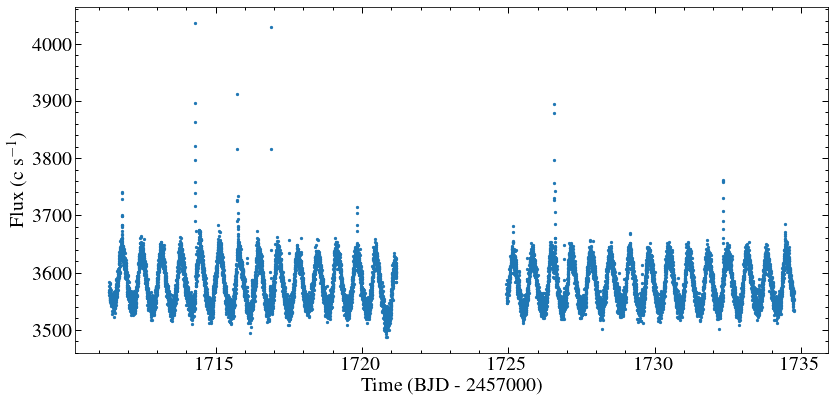

In [37]:
for tessfits in eg_uma_fits[0:1]:
    hdul = fits.open(tessfits)
    #data = fits.getdata(tessfits, 1)
    data = hdul[1].data
    hdr = hdul[0].header
    print(hdr['RA_OBJ'], hdr['DEC_OBJ'])
    hdul.close()
    t, f, e, q = data['TIME'], data['PDCSAP_FLUX'], data['PDCSAP_FLUX_ERR'], data['QUALITY']
    t, f, e = t[q==0], f[q==0], e[q==0]
    #fit = np.polyval((np.polyfit(t,f,1)), t)
    #f = (f/fit)-1
    #e = (e/fit)-1
    plt.figure(figsize=(12,6))
    plt.scatter(t,f, s=5)
    plt.ylabel(r'Flux (c s$^{-1}$)', size=20)
    plt.xlabel('Time (BJD - 2457000)', size=20)
    plt.tight_layout()
    #plt.show()
    plt.savefig('../plots/eg_uma_tess.png')
    